<a href="https://colab.research.google.com/github/mutturajiu/Python/blob/master/Time_series_Forecasting_Using_Facaebook_Prophet_Package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 2.8MB/s 


In [0]:
from fbprophet import Prophet
import seaborn as sns
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [7]:
fd=sns.load_dataset('flights')
fd.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [8]:
fd=fd.loc[:,['passengers']]
fd.head()

,passengers
0,112
1,118
2,132
3,129
4,121


In [11]:
months=pd.date_range('19490101',periods=144,freq='M')
months
fd['ds'] = months
fd.head()
fd.dtypes

passengers             int64
ds            datetime64[ns]
dtype: object

In [15]:
fd=fd.rename(columns={"passengers": "y"})
fd=fd.sort_index(axis=1)
#fd.y=np.Log(fd.y)
fd.head(5)

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [0]:
my_forecast=Prophet(interval_width=0.95)

In [17]:
my_forecast.fit(fd)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
forecast_periods=my_forecast.make_future_dataframe(periods=36,include_history=True, freq='M')
forecast_periods

,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
5,1949-06-30
6,1949-07-31
7,1949-08-31
8,1949-09-30
9,1949-10-31


In [24]:
forecast=my_forecast.predict(forecast_periods)
forecast1=forecast.loc[:,['ds', 'yhat']]
forecast1.head()

,ds,yhat
0,1949-01-31,85.240273
1,1949-02-28,77.585537
2,1949-03-31,110.948382
3,1949-04-30,108.547569
4,1949-05-31,111.819264


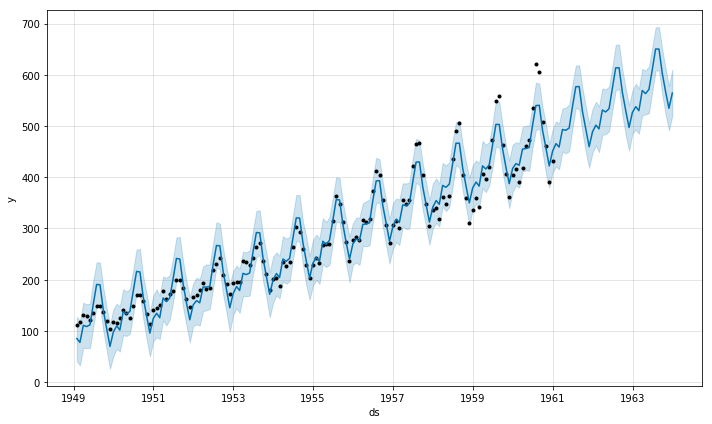

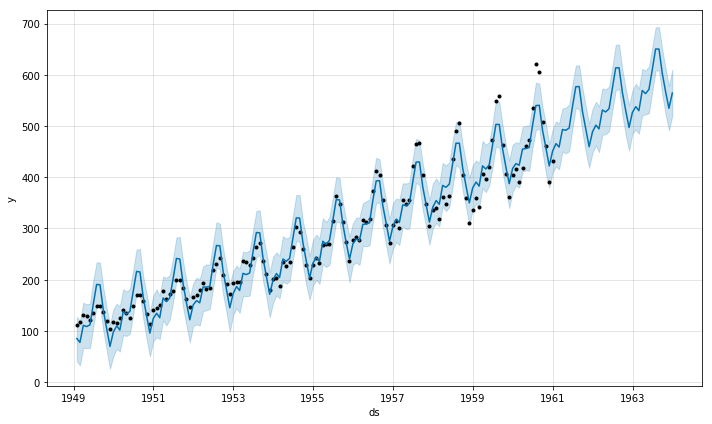

In [25]:
my_forecast.plot(forecast,
                 uncertainty=True)

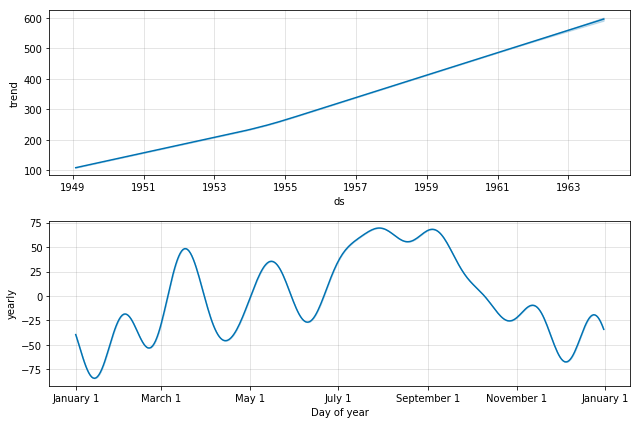

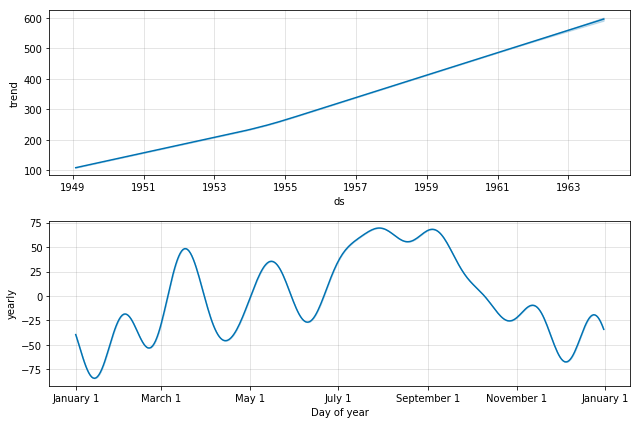

In [26]:
my_forecast.plot_components(forecast)

In [27]:
final_df=pd.merge(forecast1,fd,on='ds', how='inner')
final_df.head()

,ds,yhat,y
0,1949-01-31,85.240273,112
1,1949-02-28,77.585537,118
2,1949-03-31,110.948382,132
3,1949-04-30,108.547569,129
4,1949-05-31,111.819264,121


In [33]:
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df.yhat,final_df.y),0)


17.0

In [34]:
fd.head()

,ds,y
0,1949-01-31,4.718499
1,1949-02-28,4.770685
2,1949-03-31,4.882802
3,1949-04-30,4.859812
4,1949-05-31,4.795791


In [35]:
fd.y=np.log(fd.y)
fd.head(5)

,ds,y
0,1949-01-31,1.551491
1,1949-02-28,1.562490
2,1949-03-31,1.585719
3,1949-04-30,1.581000
4,1949-05-31,1.567739


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


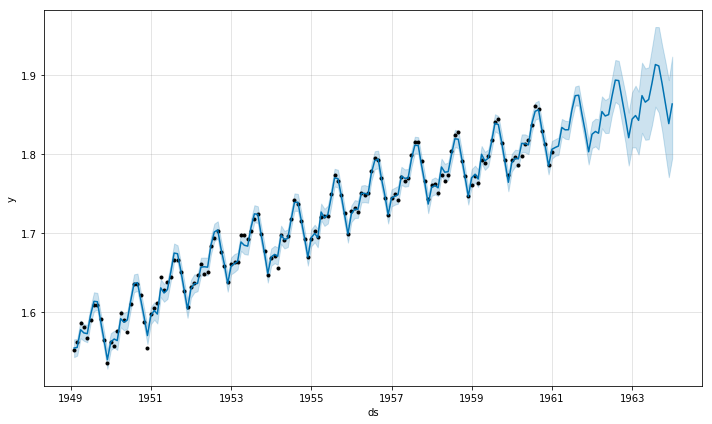

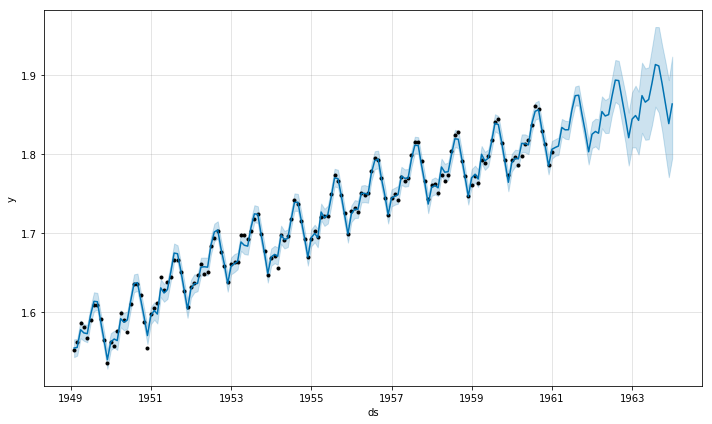

In [36]:
my_forecast=Prophet(interval_width=0.95)
my_forecast.fit(fd)
forecast_periods=my_forecast.make_future_dataframe(periods=36,include_history=True,freq='M')
forecast_periods
forecast=my_forecast.predict(forecast_periods)
forecast1 = forecast.loc[:,['ds','yhat']]
forecast1.head()
my_forecast.plot(forecast,uncertainty=True)

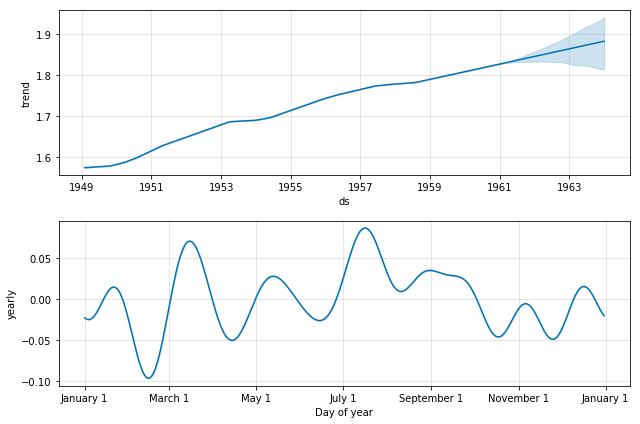

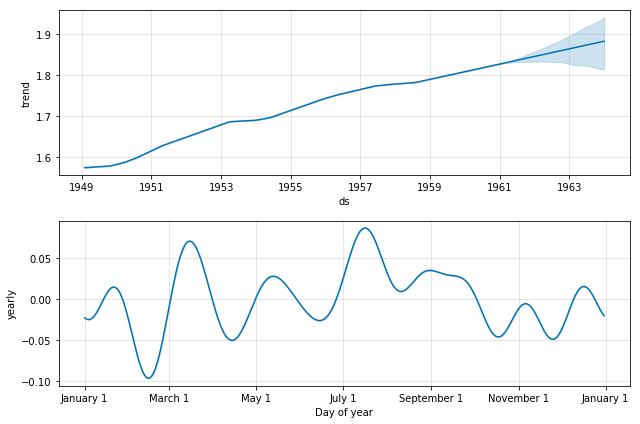

In [37]:
my_forecast.plot_components(forecast)

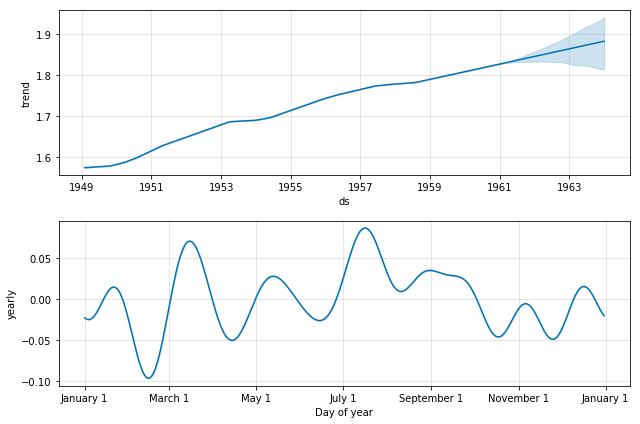

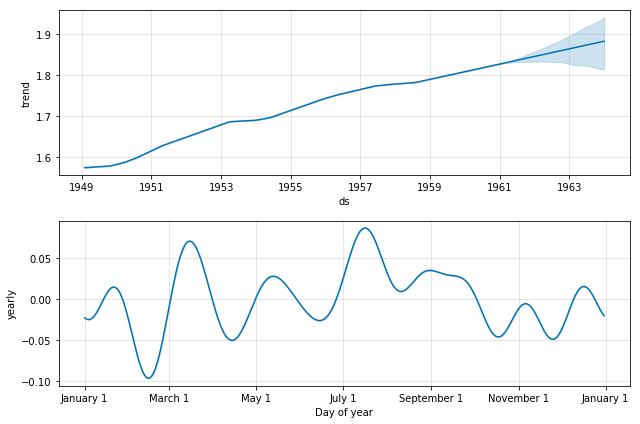

In [38]:
my_forecast.plot_components(forecast)

In [39]:
final_df1=pd.merge(forecast1,fd,on='ds',how='inner')
final_df1.head()

,ds,yhat,y
0,1949-01-31,1.554573,1.551491
1,1949-02-28,1.555347,1.562490
2,1949-03-31,1.577836,1.585719
3,1949-04-30,1.573768,1.581000
4,1949-05-31,1.572790,1.567739


In [43]:
final_df1.yhat=np.e**(final_df1.yhat)
final_df1.y=np.e**(final_df1.y)
final_df1.head()

,ds,yhat,y
0,1949-01-31,113.643602,112.0
1,1949-02-28,114.060826,118.0
2,1949-03-31,127.034866,132.0
3,1949-04-30,124.560636,129.0
4,1949-05-31,123.974617,121.0


In [50]:
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df1.yhat,final_df1.y),0)

6.0

In [44]:
final_df1.head()

,ds,yhat,y
0,1949-01-31,113.643602,112.0
1,1949-02-28,114.060826,118.0
2,1949-03-31,127.034866,132.0
3,1949-04-30,124.560636,129.0
4,1949-05-31,123.974617,121.0


In [45]:
final_df1.tail()

,ds,yhat,y
139,1960-08-31,601.941192,606.0
140,1960-09-30,514.840011,508.0
141,1960-10-31,451.680245,461.0
142,1960-11-30,388.560342,390.0
143,1960-12-31,440.872164,432.0


In [51]:
forecast2=forecast.loc[144:,['ds','yhat','yhat_lower','yhat_upper']]
forecast2.yhat=np.e**(forecast2.yhat)
forecast2.yhat_lower=np.e**(forecast2.yhat_lower)
forecast2.yhat_lower=np.e**(forecast2.yhat_upper)
np.round(forecast2,0)

,ds,yhat,yhat_lower,yhat_upper
144,1961-01-31,6.0,6.0,2.0
145,1961-02-28,6.0,6.0,2.0
146,1961-03-31,6.0,6.0,2.0
147,1961-04-30,6.0,6.0,2.0
148,1961-05-31,6.0,6.0,2.0
149,1961-06-30,6.0,6.0,2.0
150,1961-07-31,7.0,7.0,2.0
151,1961-08-31,7.0,7.0,2.0
152,1961-09-30,6.0,6.0,2.0
153,1961-10-31,6.0,6.0,2.0


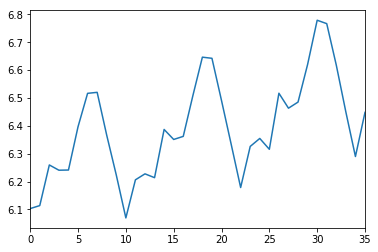

In [53]:
sns.tsplot(forecast2.yhat)
plt.show()